# 붓꽃 데이터

## 데이터 가져오기와 확인하기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seaborn 라이브러리에서 데이터 가져오기
df_rawdata_iris = sns.load_dataset('iris')
df_rawdata_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# scikit-learn 라이브러리에서 데이터 가져오기
from sklearn.datasets import load_iris
iris_dataset = load_iris()
#iris_dataset.keys()
df_rawdata_iris = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
df_rawdata_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# csv 데이터 가져오기
filename='./Data/iris.csv'
df_rawdata_iris=pd.read_csv(filename)
df_rawdata_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 기본정보
df_rawdata_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 기초통계값 확인
df_rawdata_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_species_count = pd.DataFrame(df_rawdata_iris['Species'].value_counts())
df_species_count

,Species
setosa,50
versicolor,50
virginica,50


## 데이터 전처리

In [8]:
# 결측데이터 확인하기
df_rawdata_iris.isnull().sum(), df_rawdata_iris.isna().sum()

(SepalLength    0
 SepalWidth     0
 PetalLength    0
 PetalWidth     0
 Species        0
 dtype: int64,
 SepalLength    0
 SepalWidth     0
 PetalLength    0
 PetalWidth     0
 Species        0
 dtype: int64)

In [9]:
# 중복데이터 확인하기
df_rawdata_iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [10]:
print(df_rawdata_iris.duplicated().sum())
# Keep 옵션: first, last, False(By setting keep on False, all duplicates are True.)
df_rawdata_iris[df_rawdata_iris.duplicated(keep=False)]

# 기존 방식 동일값으로 찾아내기
# result=(df_rawdata_iris['SepalLength']==5.8) & (df_rawdata_iris['PetalWidth']==1.9)
# df_rawdata_iris.loc[result,:]

1


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
# 중복데이터 삭제
# Keep 옵션: first(default), last, False(Drop all duplicates.)
df_mod00_iris = df_rawdata_iris.drop_duplicates()
# df_mod00_iris.duplicated().sum()
df_rawdata_iris.iloc[[101,142],:], df_mod00_iris.iloc[[101,142],:]

(     SepalLength  SepalWidth  PetalLength  PetalWidth    Species
 101          5.8         2.7          5.1         1.9  virginica
 142          5.8         2.7          5.1         1.9  virginica,
      SepalLength  SepalWidth  PetalLength  PetalWidth    Species
 101          5.8         2.7          5.1         1.9  virginica
 143          6.8         3.2          5.9         2.3  virginica)

## 데이터 그룹핑 및 정렬


In [12]:
df_mod00_iris.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [13]:
df_mod00_iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


## 판다스 데이터 시각화

<AxesSubplot: >

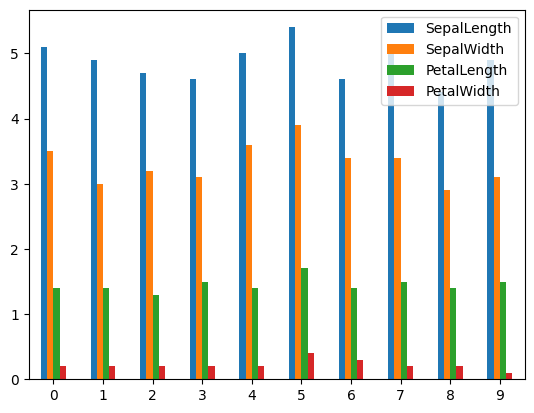

In [16]:
import matplotlib.pyplot as plt
filename='./Data/iris.csv'
df_rawdata_iris = pd.read_csv(filename)
# df_rawdata_iris.head()
df_rawdata_iris.iloc[:10].plot.bar(rot=0)

In [17]:
df_species_mean = df_rawdata_iris.groupby(df_rawdata_iris['Species']).mean()
df_species_mean

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot: xlabel='Species'>

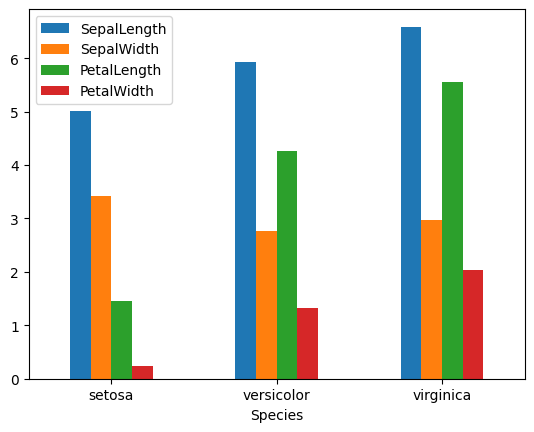

In [18]:
df_species_mean.plot.bar(rot=0)

<AxesSubplot: ylabel='Frequency'>

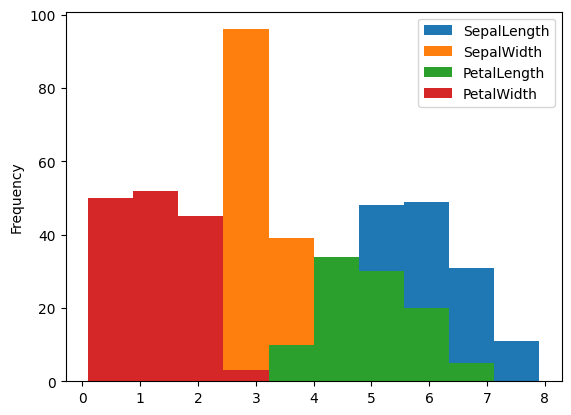

In [19]:
df_rawdata_iris.plot.hist()

<AxesSubplot: >

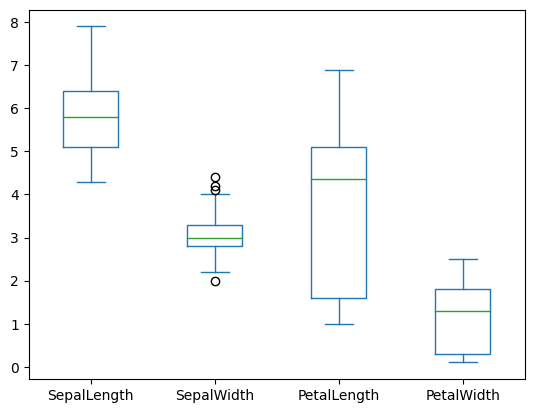

In [20]:
df_rawdata_iris.plot.box()

In [21]:
df_rawdata_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='SepalLength', ylabel='PetalLength'>

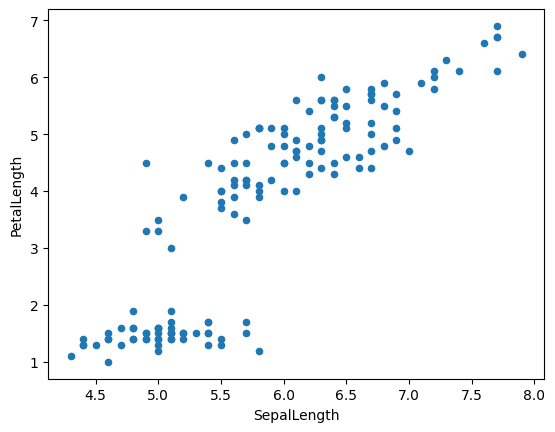

In [24]:
df_rawdata_iris.plot.scatter(x='SepalLength', y='PetalLength')

# 타이타닉 데이터

## 데이터 확인하기

In [27]:
df_rawdata_titanic = pd.read_csv('./Data/train.csv')
df_rawdata_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_rawdata_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df_rawdata_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_rawdata_titanic.sort_values('Fare', ascending=False) # 내림차순

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [32]:
pd.DataFrame(df_rawdata_titanic['Survived'].value_counts())

,Survived
0,549
1,342


## 데이터 전처리

In [34]:
df_rawdata_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
# Cabin은 결측값이 너무 많아서 삭제
df_mod00_titanic = df_rawdata_titanic.drop(['Cabin'], axis=1)

In [36]:
df_rawdata_titanic.columns, df_mod00_titanic.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Embarked'],
       dtype='object'))

In [37]:
df_mod00_titanic['Embarked'].value_counts() # 최빈값 'S'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
# Embarked의 경우 2개가 na값으로 최빈값 S으로 대체 가능
df_mod01_titanic = df_mod00_titanic.copy()
df_mod01_titanic['Embarked'] = df_mod01_titanic['Embarked'].fillna('S')
df_mod01_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [39]:
# 나이는 결측치가 많으나 생존 여부와 상관있어서 평균값으로 대체
df_mod02_titanic = df_mod01_titanic.copy()
age_avg =df_mod02_titanic['Age'].mean()
df_mod02_titanic['Age']=df_mod02_titanic['Age'].fillna(age_avg)
df_mod02_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
df_mod02_titanic['Pclass'].groupby(df_mod02_titanic["Embarked"]).mean()

Embarked
C    1.886905
Q    2.909091
S    2.346749
Name: Pclass, dtype: float64

In [41]:
df_mod02_titanic.groupby(["Pclass", "Sex"]).mean()

C:\Users\wisdo\AppData\Local\Temp\ipykernel_11416\4156106244.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mod02_titanic.groupby(["Pclass", "Sex"]).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.141405  0.553191  0.457447   
       male     455.729508  0.368852  39.287717  0.311475  0.278689   
2      female   443.105263  0.921053  28.748661  0.486842  0.605263   
       male     447.962963  0.157407  30.653908  0.342593  0.222222   
3      female   399.729167  0.500000  24.068493  0.895833  0.798611   
       male     455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

<AxesSubplot: xlabel='Pclass', ylabel='count'>

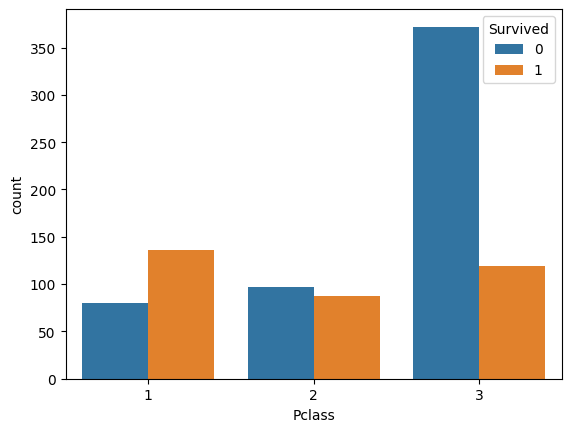

In [42]:
sns.countplot(data=df_mod02_titanic, x='Pclass', hue='Survived')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\wisdo\AppData\Local\Temp\ipykernel_11416\1295276503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_mod02_titanic.corr(), annot=True, cmap='Blues')


<AxesSubplot: >

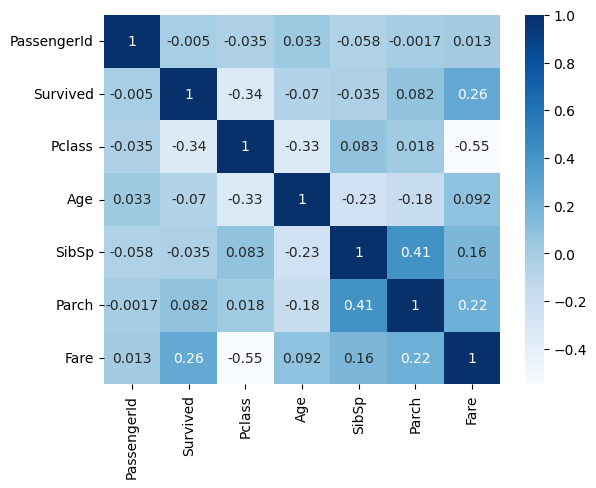

In [47]:
df_mod02_titanic.info()
sns.heatmap(data=df_mod02_titanic.corr(), annot=True, cmap='Blues')